In [11]:
# Import the necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import numpy as np  # Import NumPy for numerical operations.

# NEW! Import the functional module from PyTorch for activation functions.
import torch.nn.functional as F

import matplotlib.pyplot as plt  # Import matplotlib for plotting.
from IPython import display  # Import IPython display for rendering plots.
display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


/tmp/ipykernel_8982/2379301053.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


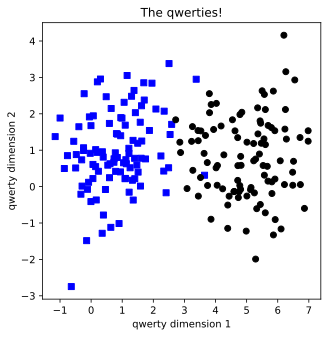

In [12]:
# Define the number of data points per cluster and blur factor.
nPerClust = 100
blur = 1

# Define the centers of two clusters as 'CenterA' and 'CenterB'.
CenterA = [1, 1]
CenterB = [5, 1]

# Generate data points around 'CenterA' and 'CenterB' with Gaussian noise.
ClusterA = [CenterA[0] + np.random.randn(nPerClust) * blur, CenterA[1] + np.random.randn(nPerClust) * blur]
ClusterB = [CenterB[0] + np.random.randn(nPerClust) * blur, CenterB[1] + np.random.randn(nPerClust) * blur]

# Create true labels for the clusters.
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# Concatenate the data points into a matrix.
data_np = np.hstack((ClusterA, ClusterB)).T

# Convert the data to a PyTorch tensor and labels to a float tensor.
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Display the data points with different colors for each cluster.
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [13]:
# Check the data types and shapes of 'data_np' and 'data'.
print(type(data_np))
print(np.shape(data_np))
print(' ')
print(type(data))
print(np.shape(data))


<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [14]:
# Define a custom neural network class 'CustomNeuralNetwork'.
class CustomNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the input layer.
        self.input_layer = nn.Linear(2, 1)

        # Define the output layer.
        self.output_layer = nn.Linear(1, 1)

    def forward(self, x):
        # Forward pass through the input layer.
        x = self.input_layer(x)

        # Apply the ReLU activation function.
        x = F.relu(x)

        # Forward pass through the output layer with sigmoid activation.
        x = self.output_layer(x)
        x = torch.sigmoid(x)

        return x

# Create an instance of the custom neural network.
custom_neural_net = CustomNeuralNetwork()


In [15]:
custom_neural_net.named_parameters

<bound method Module.named_parameters of CustomNeuralNetwork(
  (input_layer): Linear(in_features=2, out_features=1, bias=True)
  (output_layer): Linear(in_features=1, out_features=1, bias=True)
)>

In [16]:
# Set the learning rate for the model.
learning_rate = 0.01

# Define the loss function for binary classification.
loss_function = nn.BCELoss()

# Create an optimizer for the model's parameters.
optimizer = torch.optim.SGD(custom_neural_net.parameters(), lr=learning_rate)


In [17]:
# Train the model for a specified number of epochs.
num_epochs = 1000
losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    # Forward pass
    y_hat = custom_neural_net(data)

    # Compute the loss
    loss = loss_function(y_hat, labels)
    losses[epoch] = loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


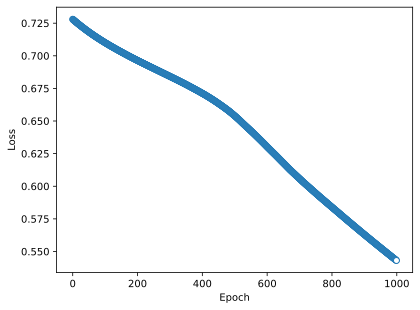

In [18]:
# Plot the losses over epochs.
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
# Compute predictions, misclassified points, and accuracy.
predictions = custom_neural_net(data)
predicted_labels = predictions > 0.5
misclassified_indices = np.where(predicted_labels != labels)[0]
total_accuracy = 100 - 100 * len(misclassified_indices) / (2 * nPerClust)

# Print the final accuracy.
print('Final accuracy: %g%%' % total_accuracy)


Final accuracy: 81%


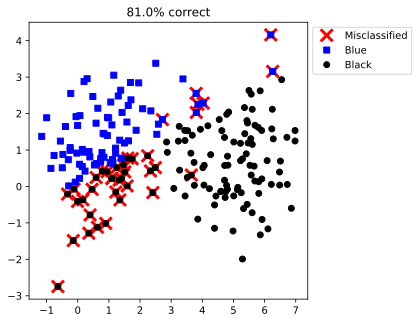

In [20]:
# Plot the labeled data points with misclassifications highlighted.
fig = plt.figure(figsize=(5, 5))
plt.plot(data[misclassified_indices, 0], data[misclassified_indices, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[np.where(~predicted_labels)[0], 0], data[np.where(~predicted_labels)[0], 1], 'bs')
plt.plot(data[np.where(predicted_labels)[0], 0], data[np.where(predicted_labels)[0], 1], 'ko')

plt.legend(['Misclassified', 'Blue', 'Black'], bbox_to_anchor=(1, 1))
plt.title(f'{total_accuracy}% correct')
plt.show()
